In [1]:
import math
import pandas as pd
import seaborn as sns
from numpy import nan, log
from textwrap import wrap
import warnings

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
filepath = './data/compiled_cbm'

In [3]:
## Read in all water quality and nutrient datasets
## Convert DateTimeStamp to datetime format
ipwq = pd.read_csv(filepath + '/cbmipwq.csv')
ipwq['DateTimeStamp'] = pd.to_datetime(ipwq['DateTimeStamp'])

jbwq = pd.read_csv(filepath + '/cbmjbwq.csv')
jbwq['DateTimeStamp'] = pd.to_datetime(jbwq['DateTimeStamp'])

mbwq = pd.read_csv(filepath + '/cbmmbwq.csv')
mbwq['DateTimeStamp'] = pd.to_datetime(mbwq['DateTimeStamp'])

mcwq = pd.read_csv(filepath + '/cbmmcwq.csv')
mcwq['DateTimeStamp'] = pd.to_datetime(mcwq['DateTimeStamp'])

ocwq = pd.read_csv(filepath + '/cbmocwq.csv')
ocwq['DateTimeStamp'] = pd.to_datetime(ocwq['DateTimeStamp'])

prwq = pd.read_csv(filepath + '/cbmprwq.csv')
prwq['DateTimeStamp'] = pd.to_datetime(prwq['DateTimeStamp'])

rrwq = pd.read_csv(filepath + '/cbmrrwq.csv')
rrwq['DateTimeStamp'] = pd.to_datetime(rrwq['DateTimeStamp'])

jbmet = pd.read_csv(filepath + '/cbmjbmet.csv')
jbmet['DateTimeStamp'] = pd.to_datetime(jbmet['DateTimeStamp'])

ipnut = pd.read_csv(filepath + '/cbmipnut.csv')
ipnut['DateTimeStamp'] = pd.to_datetime(ipnut['DateTimeStamp'])

mbnut = pd.read_csv(filepath + '/cbmmbnut.csv')
mbnut['DateTimeStamp'] = pd.to_datetime(mbnut['DateTimeStamp'])

mcnut = pd.read_csv(filepath + '/cbmmcnut.csv')
mcnut['DateTimeStamp'] = pd.to_datetime(mcnut['DateTimeStamp'])

ocnut = pd.read_csv(filepath + '/cbmocnut.csv')
ocnut['DateTimeStamp'] = pd.to_datetime(ocnut['DateTimeStamp'])

rrnut = pd.read_csv(filepath + '/cbmrrnut.csv')
rrnut['DateTimeStamp'] = pd.to_datetime(rrnut['DateTimeStamp'])

C:\Users\julie\AppData\Local\Temp\ipykernel_13012\2372406637.py:3: DtypeWarning: Columns (5,19) have mixed types. Specify dtype option on import or set low_memory=False.
  ipwq = pd.read_csv(filepath + '/cbmipwq.csv')
C:\Users\julie\AppData\Local\Temp\ipykernel_13012\2372406637.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  mbwq = pd.read_csv(filepath + '/cbmmbwq.csv')
C:\Users\julie\AppData\Local\Temp\ipykernel_13012\2372406637.py:12: DtypeWarning: Columns (5,19) have mixed types. Specify dtype option on import or set low_memory=False.
  mcwq = pd.read_csv(filepath + '/cbmmcwq.csv')
C:\Users\julie\AppData\Local\Temp\ipykernel_13012\2372406637.py:15: DtypeWarning: Columns (5,19) have mixed types. Specify dtype option on import or set low_memory=False.
  ocwq = pd.read_csv(filepath + '/cbmocwq.csv')
C:\Users\julie\AppData\Local\Temp\ipykernel_13012\2372406637.py:21: DtypeWarning: Columns (5,19) have mixed types. Specify dtype 

In [4]:
dfList = [ipwq, jbwq, mbwq, mcwq, ocwq, prwq, rrwq, ipnut, mbnut, mcnut, ocnut, rrnut, jbmet]
dfs = [df.set_index('DateTimeStamp') for df in dfList]

In [5]:
len(ipwq)

683687

In [6]:
ipwq.isnull().sum()
ipwq.notnull().sum()
#See percentage of missing data
missing = ipwq.notnull().sum() / len(ipwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             4.304016
Temp                94.343610
F_Temp             100.000000
SpCond              93.506093
F_SpCond           100.000000
Sal                 93.633198
F_Sal              100.000000
DO_Pct              91.928031
F_DO_Pct           100.000000
DO_mgl              91.709949
F_DO_mgl           100.000000
Depth               93.268703
F_Depth            100.000000
cDepth              57.564353
F_cDepth            78.619456
Level                0.000000
F_Level            100.000000
cLevel               0.000000
F_cLevel             0.000000
pH                  90.302287
F_pH               100.000000
Turb                90.185129
F_Turb             100.000000
ChlFluor            63.837838
F_ChlFluor         100.000000
dtype: float64


In [7]:
ipwq = ipwq.dropna(axis='columns', thresh = 27348)
ipwq = ipwq.drop(['ProvisionalPlus','Historical'],axis=1)

In [8]:
ipwq.isnull().sum()
ipwq.notnull().sum()
#See percentage of missing data
missing = ipwq.notnull().sum() / len(ipwq) * 100
print(missing)

StationCode      100.000000
isSWMP           100.000000
DateTimeStamp    100.000000
F_Record           4.304016
Temp              94.343610
F_Temp           100.000000
SpCond            93.506093
F_SpCond         100.000000
Sal               93.633198
F_Sal            100.000000
DO_Pct            91.928031
F_DO_Pct         100.000000
DO_mgl            91.709949
F_DO_mgl         100.000000
Depth             93.268703
F_Depth          100.000000
cDepth            57.564353
F_cDepth          78.619456
F_Level          100.000000
pH                90.302287
F_pH             100.000000
Turb              90.185129
F_Turb           100.000000
ChlFluor          63.837838
F_ChlFluor       100.000000
dtype: float64


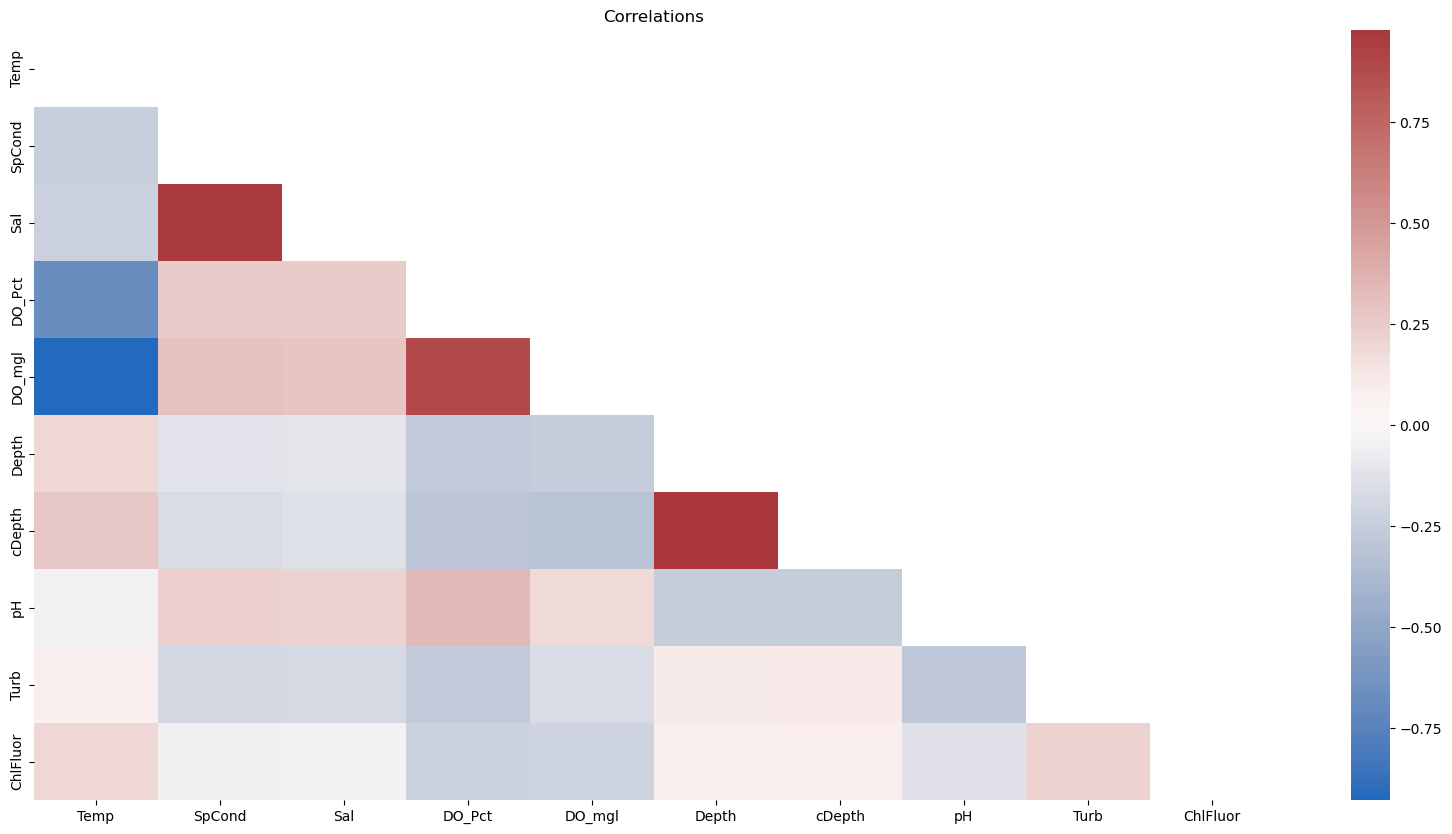

In [9]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(ipwq.corr(), annot = False, mask = np.triu(ipwq.corr()), cmap = 'vlag')
plt.show();

In [10]:
len(jbwq)

66536

In [11]:
jbwq.isnull().sum()
jbwq.notnull().sum()
#See percentage of missing data
missing = jbwq.notnull().sum() / len(jbwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             0.000000
Temp                84.394914
F_Temp             100.000000
SpCond              84.394914
F_SpCond           100.000000
Sal                 84.394914
F_Sal              100.000000
DO_Pct              72.218047
F_DO_Pct           100.000000
DO_mgl              72.218047
F_DO_mgl           100.000000
Depth               84.394914
F_Depth            100.000000
cDepth               0.000000
F_cDepth            54.714741
Level                0.000000
F_Level            100.000000
cLevel               0.000000
F_cLevel             0.000000
pH                  72.897379
F_pH               100.000000
Turb                 9.928460
F_Turb             100.000000
ChlFluor             0.000000
F_ChlFluor         100.000000
dtype: float64


In [12]:
jbwq = jbwq.dropna(axis='columns', thresh = 5322)
jbwq = jbwq.drop(['ProvisionalPlus','Historical'],axis=1)

In [13]:
jbwq.isnull().sum()
jbwq.notnull().sum()
#See percentage of missing data
missing = jbwq.notnull().sum() / len(jbwq) * 100
print(missing)

StationCode      100.000000
isSWMP           100.000000
DateTimeStamp    100.000000
Temp              84.394914
F_Temp           100.000000
SpCond            84.394914
F_SpCond         100.000000
Sal               84.394914
F_Sal            100.000000
DO_Pct            72.218047
F_DO_Pct         100.000000
DO_mgl            72.218047
F_DO_mgl         100.000000
Depth             84.394914
F_Depth          100.000000
F_cDepth          54.714741
F_Level          100.000000
pH                72.897379
F_pH             100.000000
Turb               9.928460
F_Turb           100.000000
F_ChlFluor       100.000000
dtype: float64


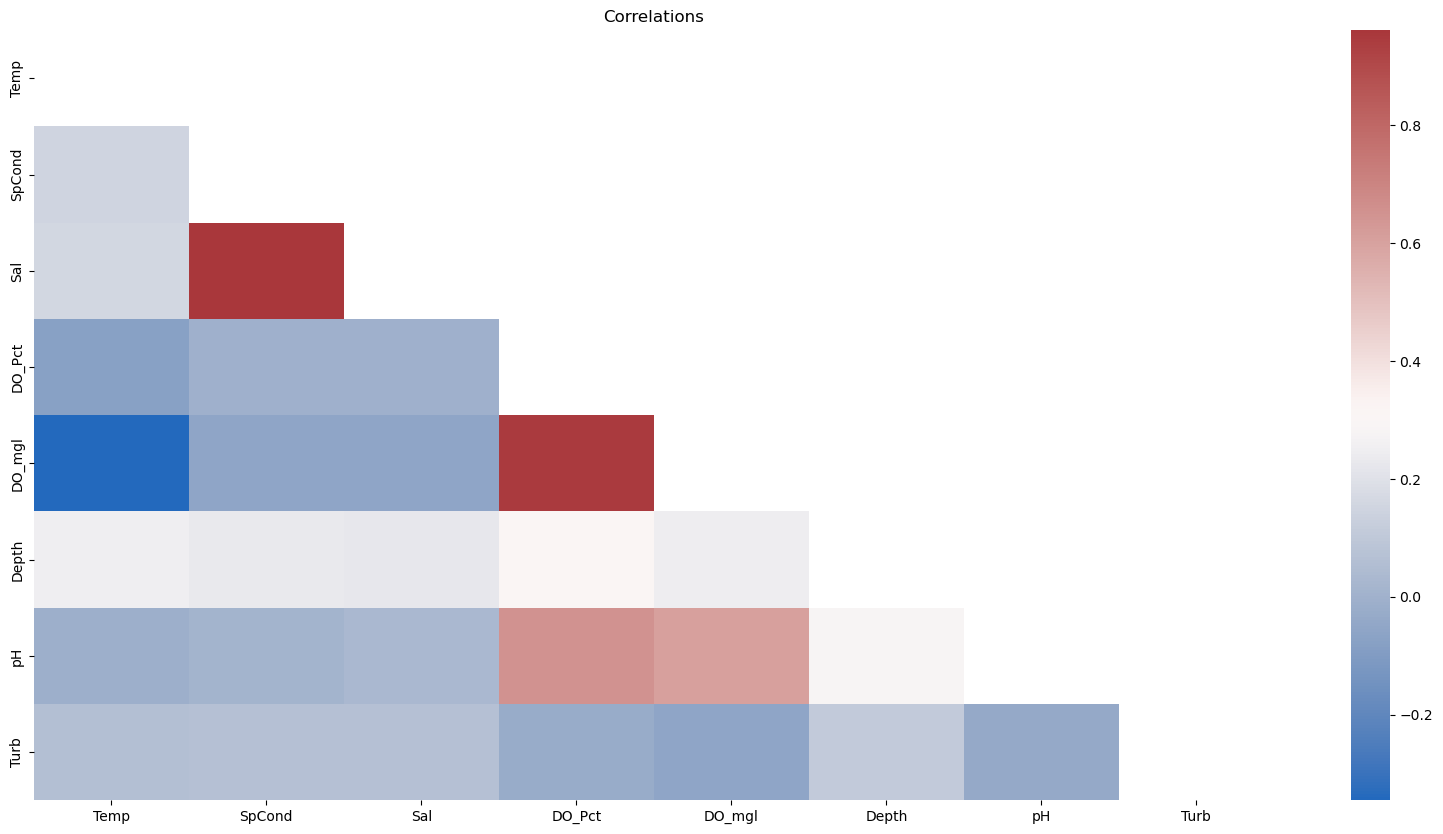

In [14]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(jbwq.corr(), annot = False, mask = np.triu(jbwq.corr()), cmap = 'vlag')
plt.show();

In [15]:
len(mbwq)

93587

In [16]:
mbwq.isnull().sum()
mbwq.notnull().sum()
#See percentage of missing data
missing = mbwq.notnull().sum() / len(mbwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             4.254864
Temp                98.691058
F_Temp             100.000000
SpCond              98.645111
F_SpCond           100.000000
Sal                 98.645111
F_Sal              100.000000
DO_Pct              98.682509
F_DO_Pct           100.000000
DO_mgl              98.650454
F_DO_mgl           100.000000
Depth               87.463002
F_Depth            100.000000
cDepth              85.541795
F_cDepth           100.000000
Level                0.000000
F_Level            100.000000
cLevel               0.000000
F_cLevel             0.000000
pH                  91.691154
F_pH               100.000000
Turb                99.216772
F_Turb             100.000000
ChlFluor            98.653659
F_ChlFluor         100.000000
dtype: float64


In [17]:
mbwq = mbwq.dropna(axis='columns', thresh = 3743)
mbwq = mbwq.drop(['ProvisionalPlus','Historical'],axis=1)

In [18]:
mbwq.isnull().sum()
mbwq.notnull().sum()
#See percentage of missing data
missing = mbwq.notnull().sum() / len(mbwq) * 100
print(missing)

StationCode      100.000000
isSWMP           100.000000
DateTimeStamp    100.000000
F_Record           4.254864
Temp              98.691058
F_Temp           100.000000
SpCond            98.645111
F_SpCond         100.000000
Sal               98.645111
F_Sal            100.000000
DO_Pct            98.682509
F_DO_Pct         100.000000
DO_mgl            98.650454
F_DO_mgl         100.000000
Depth             87.463002
F_Depth          100.000000
cDepth            85.541795
F_cDepth         100.000000
F_Level          100.000000
pH                91.691154
F_pH             100.000000
Turb              99.216772
F_Turb           100.000000
ChlFluor          98.653659
F_ChlFluor       100.000000
dtype: float64


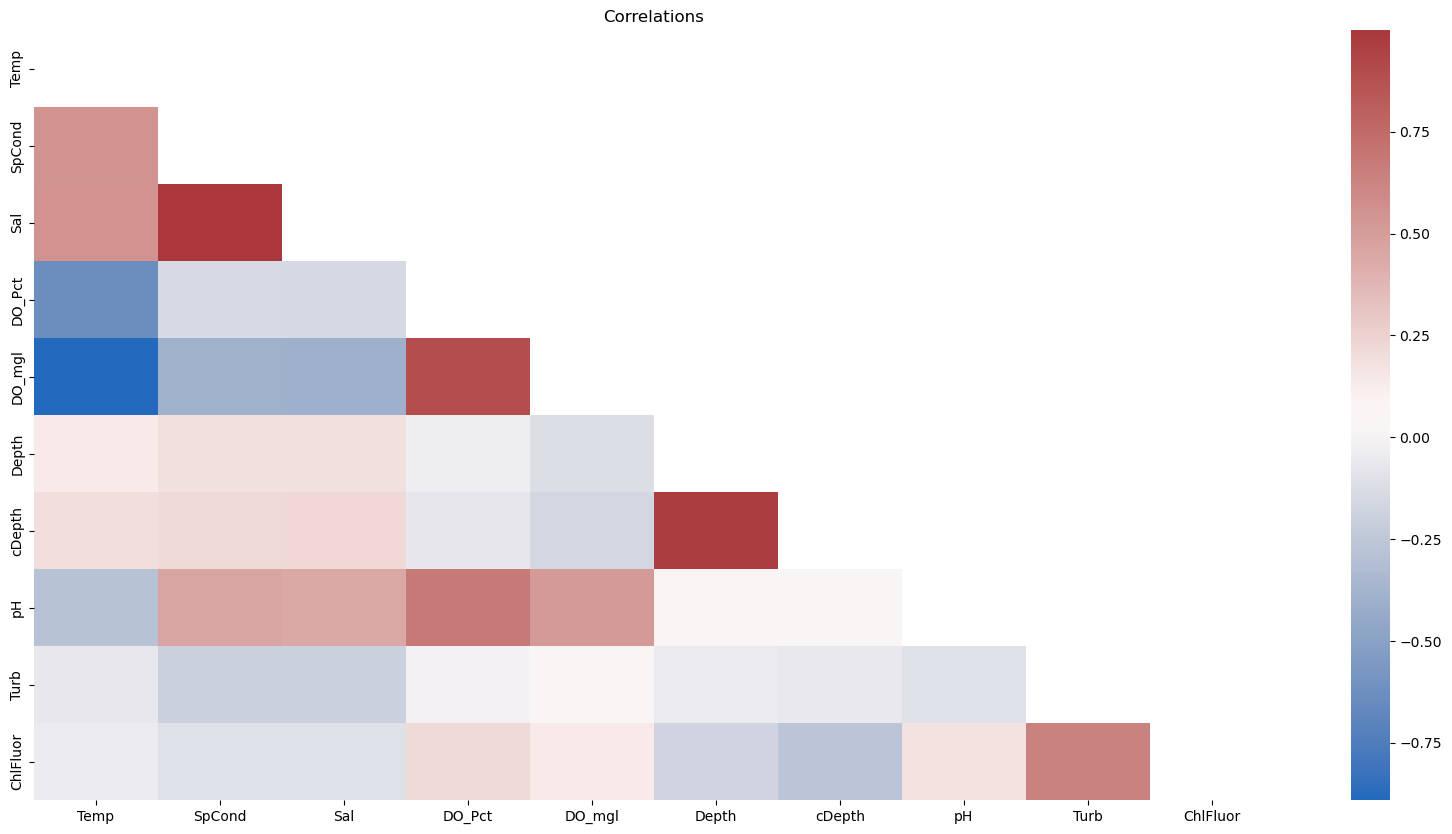

In [19]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(mbwq.corr(), annot = False, mask = np.triu(mbwq.corr()), cmap = 'vlag')
plt.show();

In [20]:
len(mcwq)

680546

In [21]:
mcwq.isnull().sum()
mcwq.notnull().sum()
#See percentage of missing data
missing = mcwq.notnull().sum() / len(mcwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             2.833166
Temp                76.699738
F_Temp             100.000000
SpCond              75.788705
F_SpCond           100.000000
Sal                 75.789146
F_Sal              100.000000
DO_Pct              74.654616
F_DO_Pct           100.000000
DO_mgl              74.117694
F_DO_mgl           100.000000
Depth               74.688118
F_Depth            100.000000
cDepth              44.258287
F_cDepth            64.676010
Level                0.000000
F_Level            100.000000
cLevel               0.000000
F_cLevel             0.000000
pH                  73.569898
F_pH               100.000000
Turb                72.844745
F_Turb             100.000000
ChlFluor            50.534424
F_ChlFluor         100.000000
dtype: float64


In [22]:
mcwq = mcwq.dropna(axis='columns', thresh = 13611)
mcwq = mcwq.drop(['ProvisionalPlus','Historical'],axis=1)

In [23]:
mcwq.isnull().sum()
mcwq.notnull().sum()
#See percentage of missing data
missing = mcwq.notnull().sum() / len(mcwq) * 100
print(missing)

StationCode      100.000000
isSWMP           100.000000
DateTimeStamp    100.000000
F_Record           2.833166
Temp              76.699738
F_Temp           100.000000
SpCond            75.788705
F_SpCond         100.000000
Sal               75.789146
F_Sal            100.000000
DO_Pct            74.654616
F_DO_Pct         100.000000
DO_mgl            74.117694
F_DO_mgl         100.000000
Depth             74.688118
F_Depth          100.000000
cDepth            44.258287
F_cDepth          64.676010
F_Level          100.000000
pH                73.569898
F_pH             100.000000
Turb              72.844745
F_Turb           100.000000
ChlFluor          50.534424
F_ChlFluor       100.000000
dtype: float64


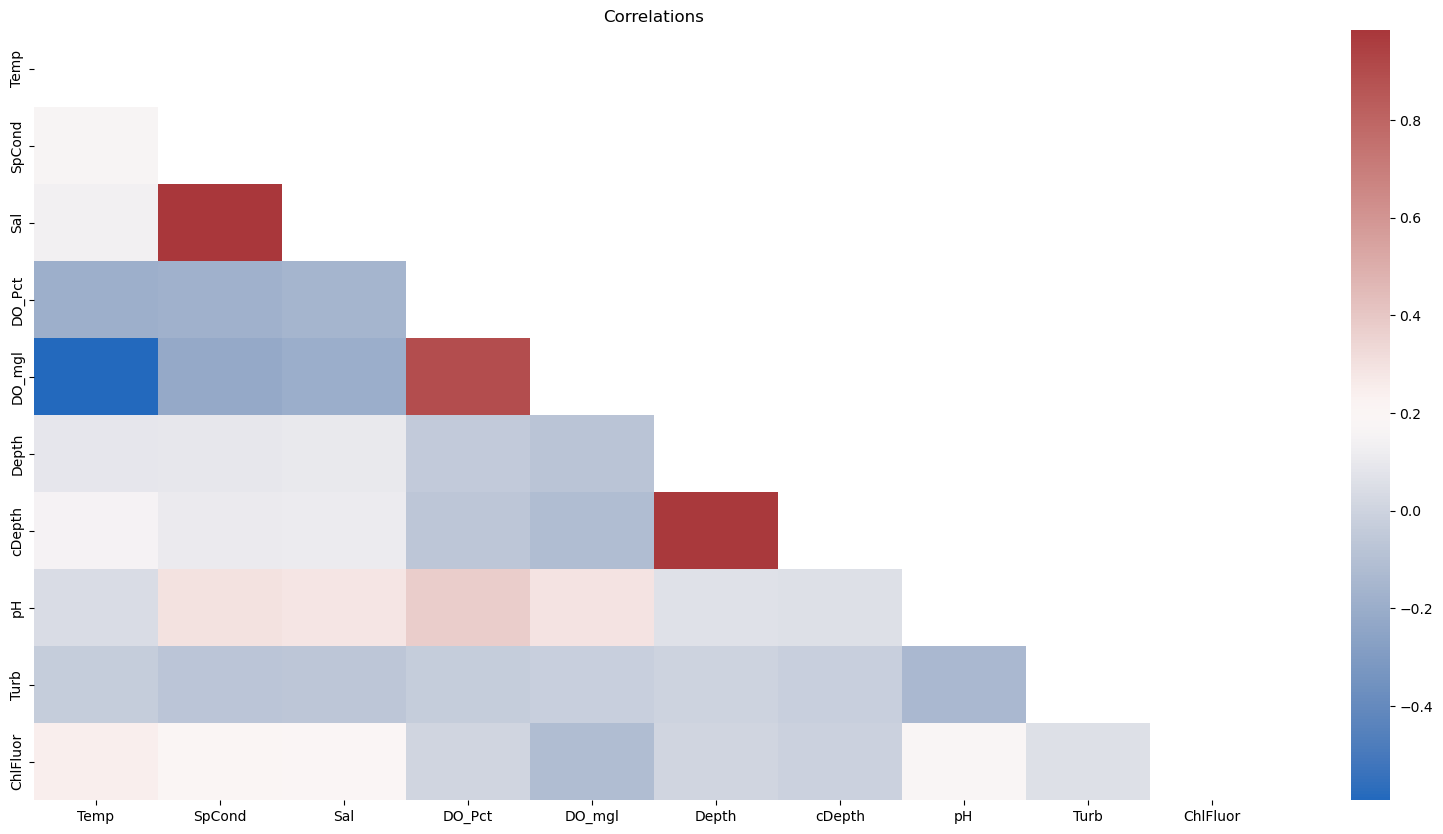

In [24]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(mcwq.corr(), annot = False, mask = np.triu(mcwq.corr()), cmap = 'vlag')
plt.show();

In [25]:
len(ocwq)

667685

In [26]:
ocwq.isnull().sum()
ocwq.notnull().sum()
#See percentage of missing data
missing = ocwq.notnull().sum() / len(ocwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             1.644638
Temp                73.171181
F_Temp             100.000000
SpCond              73.020811
F_SpCond           100.000000
Sal                 73.017516
F_Sal              100.000000
DO_Pct              70.910983
F_DO_Pct           100.000000
DO_mgl              70.907689
F_DO_mgl           100.000000
Depth               69.727192
F_Depth            100.000000
cDepth              43.322225
F_cDepth            58.439833
Level                0.000000
F_Level            100.000000
cLevel               0.000000
F_cLevel             0.000000
pH                  70.837146
F_pH               100.000000
Turb                70.709990
F_Turb             100.000000
ChlFluor            48.961411
F_ChlFluor         100.000000
dtype: float64


In [27]:
ocwq = ocwq.dropna(axis='columns', thresh = 6677)
ocwq = ocwq.drop(['ProvisionalPlus','Historical'],axis=1)

In [28]:
ocwq.isnull().sum()
ocwq.notnull().sum()
#See percentage of missing data
missing = ocwq.notnull().sum() / len(ocwq) * 100
print(missing)

StationCode      100.000000
isSWMP           100.000000
DateTimeStamp    100.000000
F_Record           1.644638
Temp              73.171181
F_Temp           100.000000
SpCond            73.020811
F_SpCond         100.000000
Sal               73.017516
F_Sal            100.000000
DO_Pct            70.910983
F_DO_Pct         100.000000
DO_mgl            70.907689
F_DO_mgl         100.000000
Depth             69.727192
F_Depth          100.000000
cDepth            43.322225
F_cDepth          58.439833
F_Level          100.000000
pH                70.837146
F_pH             100.000000
Turb              70.709990
F_Turb           100.000000
ChlFluor          48.961411
F_ChlFluor       100.000000
dtype: float64


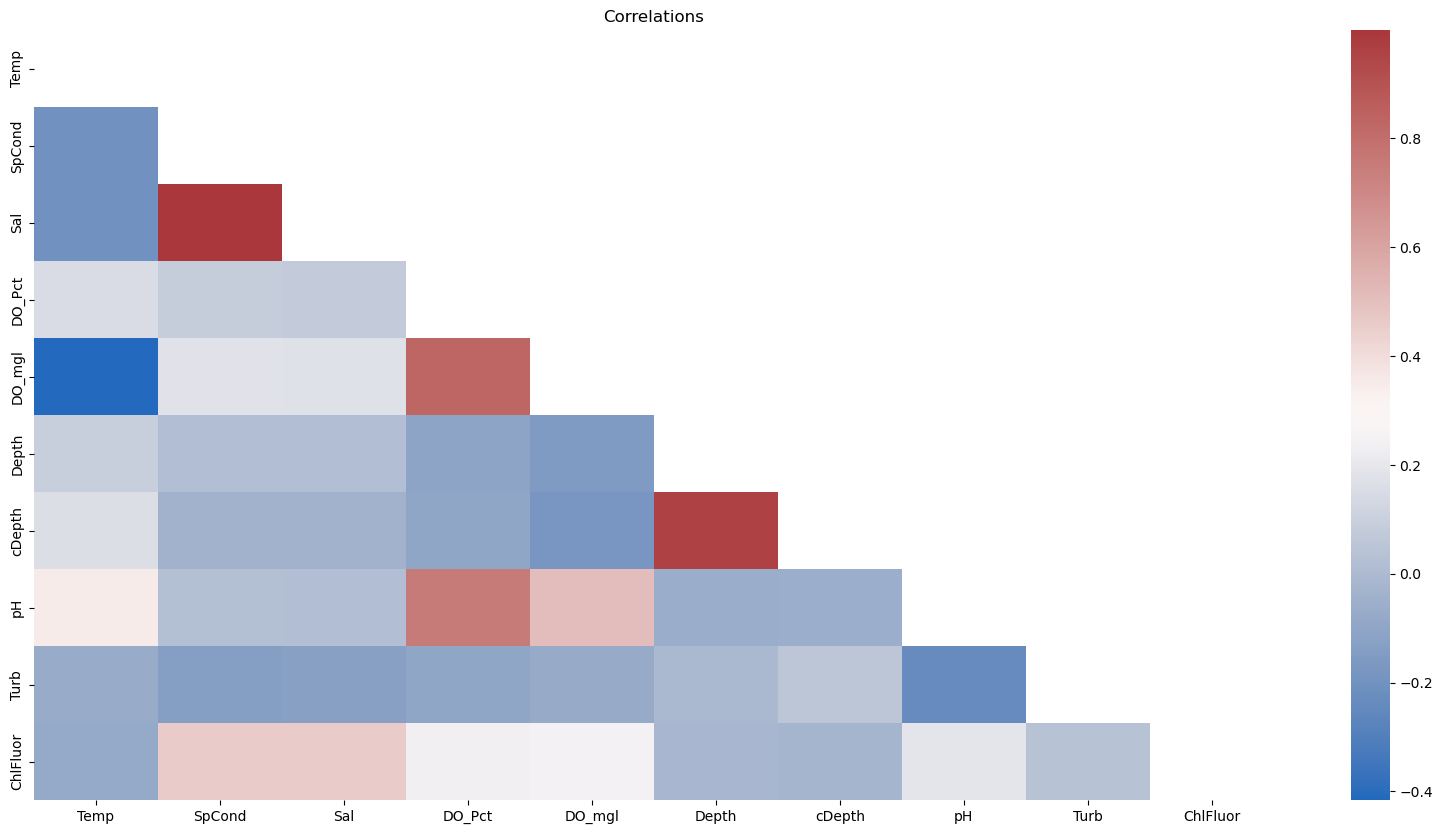

In [29]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(ocwq.corr(), annot = False, mask = np.triu(ocwq.corr()), cmap = 'vlag')
plt.show();

In [30]:
len(prwq)

56437

In [31]:
prwq.isnull().sum()
prwq.notnull().sum()
#See percentage of missing data
missing = prwq.notnull().sum() / len(prwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             0.000000
Temp                83.888229
F_Temp             100.000000
SpCond              83.886457
F_SpCond           100.000000
Sal                 83.886457
F_Sal              100.000000
DO_Pct              66.569803
F_DO_Pct           100.000000
DO_mgl              66.566260
F_DO_mgl           100.000000
Depth               82.965076
F_Depth            100.000000
cDepth               0.000000
F_cDepth            56.875808
Level                0.000000
F_Level            100.000000
cLevel               0.000000
F_cLevel             0.000000
pH                  71.880150
F_pH               100.000000
Turb                20.403282
F_Turb             100.000000
ChlFluor             0.000000
F_ChlFluor         100.000000
dtype: float64


In [32]:
prwq = prwq.dropna(axis='columns', thresh = 1000)
prwq = prwq.drop(['ProvisionalPlus','Historical'],axis=1)

In [33]:
prwq.isnull().sum()
prwq.notnull().sum()
#See percentage of missing data
missing = prwq.notnull().sum() / len(prwq) * 100
print(missing)

StationCode      100.000000
isSWMP           100.000000
DateTimeStamp    100.000000
Temp              83.888229
F_Temp           100.000000
SpCond            83.886457
F_SpCond         100.000000
Sal               83.886457
F_Sal            100.000000
DO_Pct            66.569803
F_DO_Pct         100.000000
DO_mgl            66.566260
F_DO_mgl         100.000000
Depth             82.965076
F_Depth          100.000000
F_cDepth          56.875808
F_Level          100.000000
pH                71.880150
F_pH             100.000000
Turb              20.403282
F_Turb           100.000000
F_ChlFluor       100.000000
dtype: float64


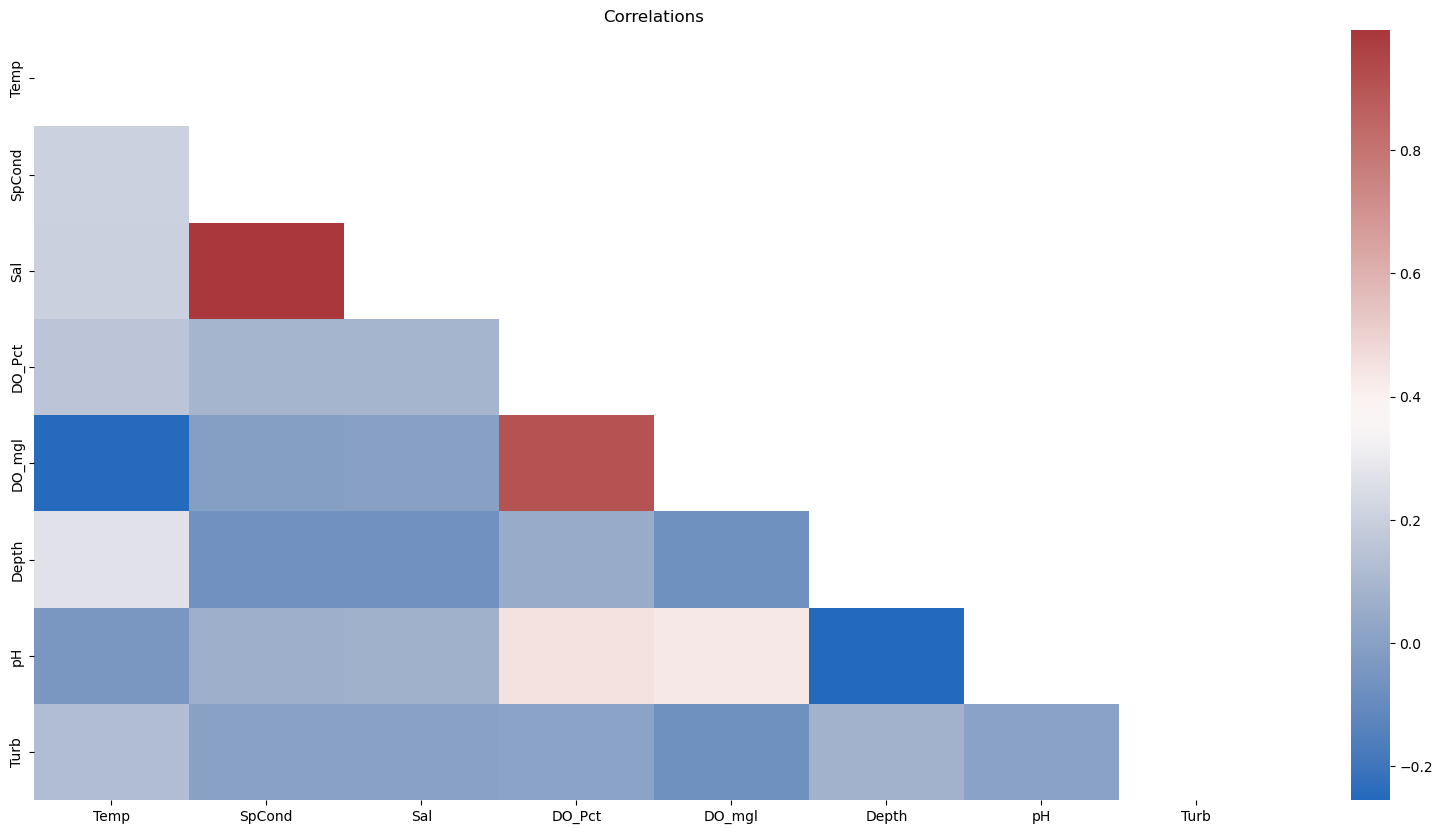

In [34]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(prwq.corr(), annot = False, mask = np.triu(prwq.corr()), cmap = 'vlag')
plt.show();

In [35]:
len(rrwq)

685399

In [36]:
rrwq.isnull().sum()
rrwq.notnull().sum()
#See percentage of missing data
missing = rrwq.notnull().sum() / len(rrwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             2.898020
Temp                97.392760
F_Temp             100.000000
SpCond              97.072946
F_SpCond           100.000000
Sal                 97.072946
F_Sal              100.000000
DO_Pct              94.238247
F_DO_Pct           100.000000
DO_mgl              94.165442
F_DO_mgl           100.000000
Depth               95.750650
F_Depth            100.000000
cDepth              58.573036
F_cDepth            80.220135
Level                0.000000
F_Level            100.000000
cLevel               0.000000
F_cLevel             0.000000
pH                  91.479853
F_pH               100.000000
Turb                94.699292
F_Turb             100.000000
ChlFluor            67.188309
F_ChlFluor         100.000000
dtype: float64


In [37]:
rrwq = rrwq.dropna(axis='columns', thresh = 13706)
rrwq = rrwq.drop(['ProvisionalPlus','Historical'],axis=1)

In [38]:
rrwq.isnull().sum()
rrwq.notnull().sum()
#See percentage of missing data
missing = rrwq.notnull().sum() / len(rrwq) * 100
print(missing)

StationCode      100.000000
isSWMP           100.000000
DateTimeStamp    100.000000
F_Record           2.898020
Temp              97.392760
F_Temp           100.000000
SpCond            97.072946
F_SpCond         100.000000
Sal               97.072946
F_Sal            100.000000
DO_Pct            94.238247
F_DO_Pct         100.000000
DO_mgl            94.165442
F_DO_mgl         100.000000
Depth             95.750650
F_Depth          100.000000
cDepth            58.573036
F_cDepth          80.220135
F_Level          100.000000
pH                91.479853
F_pH             100.000000
Turb              94.699292
F_Turb           100.000000
ChlFluor          67.188309
F_ChlFluor       100.000000
dtype: float64


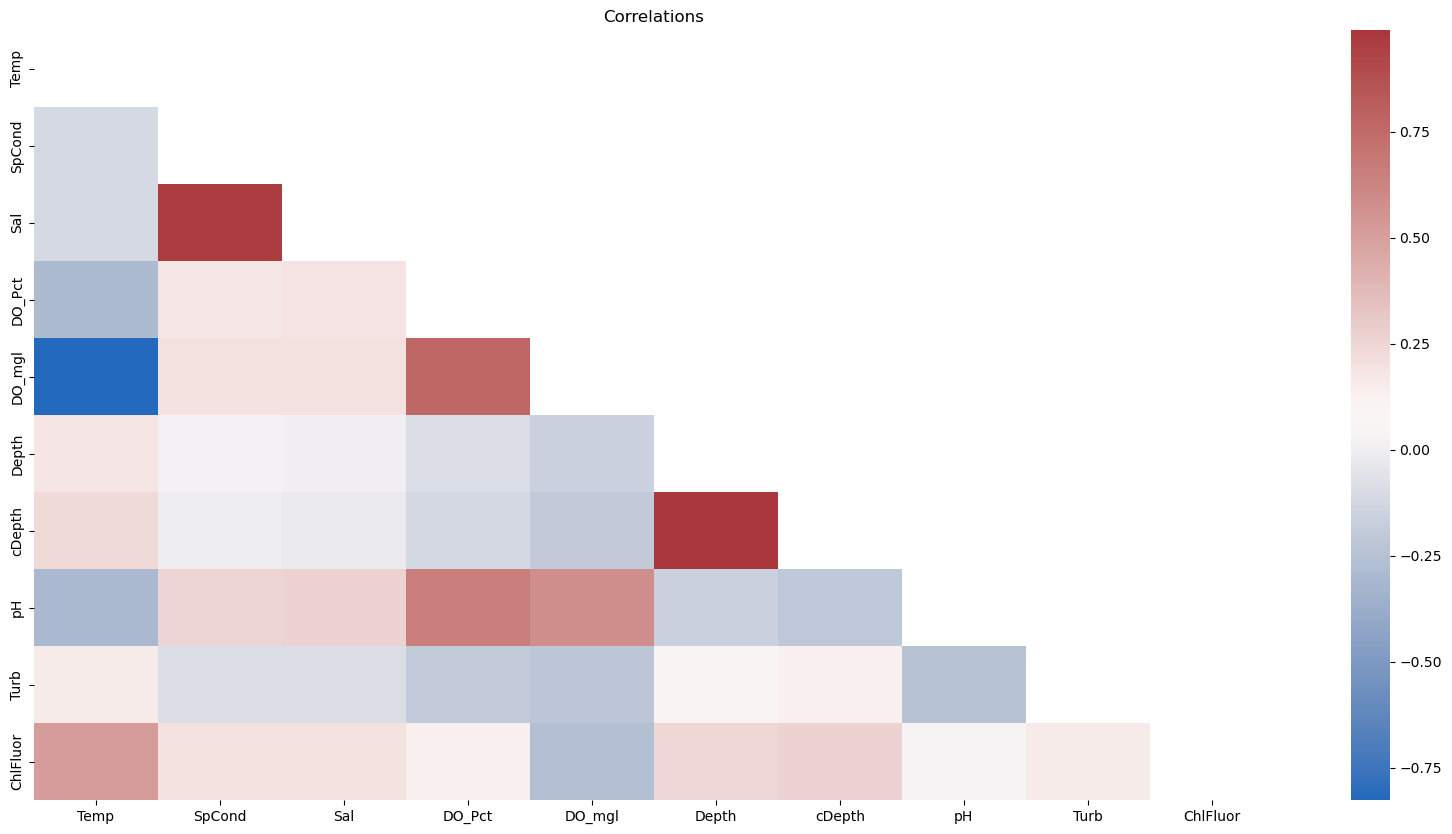

In [39]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(rrwq.corr(), annot = False, mask = np.triu(rrwq.corr()), cmap = 'vlag')
plt.show();

In [40]:
len(jbmet)

674933

In [41]:
jbmet.isnull().sum()
jbmet.notnull().sum()
#See percentage of missing data
missing = jbmet.notnull().sum() / len(jbmet) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
Frequency          100.000000
F_Record             8.751387
ATemp               96.690634
F_ATemp            100.000000
RH                  91.609093
F_RH               100.000000
BP                  97.235726
F_BP               100.000000
WSpd                96.755233
F_WSpd             100.000000
MaxWSpd             90.594918
F_MaxWSpd          100.000000
MaxWSpdT            93.872725
Wdir                97.139864
F_Wdir             100.000000
SDWDir              87.052344
F_SDWDir           100.000000
TotPAR              95.369318
F_TotPAR           100.000000
TotPrcp             94.846600
F_TotPrcp          100.000000
TotSoRad             0.000000
F_TotSoRad         100.000000
dtype: float64


In [42]:
jbmet = jbmet.dropna(axis='columns', thresh = 13499)
jbmet = jbmet.drop(['ProvisionalPlus','Historical','Frequency'],axis=1)

In [43]:
jbmet.isnull().sum()
jbmet.notnull().sum()
#See percentage of missing data
missing = jbmet.notnull().sum() / len(jbmet) * 100
print(missing)

StationCode      100.000000
isSWMP           100.000000
DateTimeStamp    100.000000
F_Record           8.751387
ATemp             96.690634
F_ATemp          100.000000
RH                91.609093
F_RH             100.000000
BP                97.235726
F_BP             100.000000
WSpd              96.755233
F_WSpd           100.000000
MaxWSpd           90.594918
F_MaxWSpd        100.000000
MaxWSpdT          93.872725
Wdir              97.139864
F_Wdir           100.000000
SDWDir            87.052344
F_SDWDir         100.000000
TotPAR            95.369318
F_TotPAR         100.000000
TotPrcp           94.846600
F_TotPrcp        100.000000
F_TotSoRad       100.000000
dtype: float64


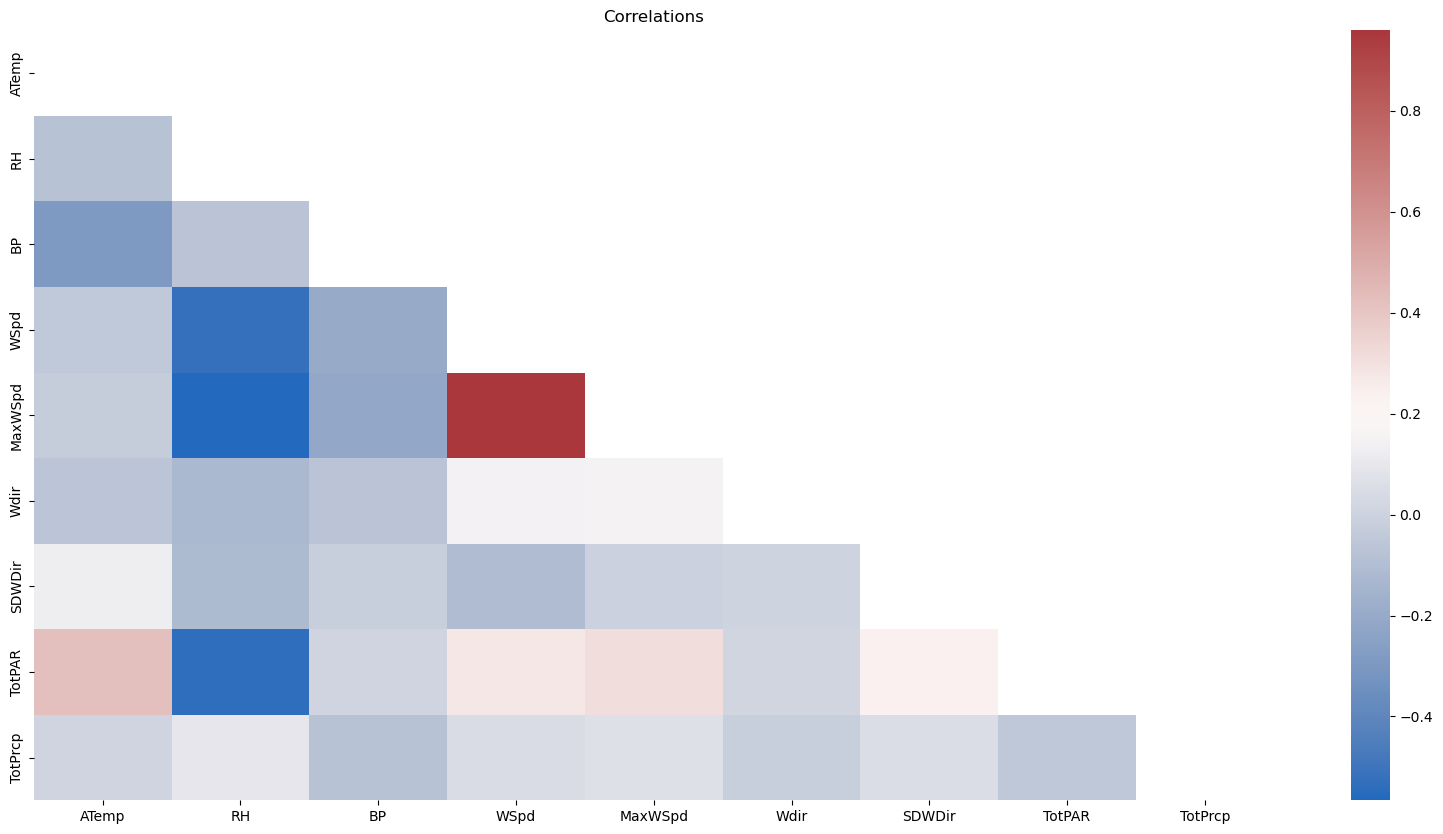

In [44]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(jbmet.corr(), annot = False, mask = np.triu(jbmet.corr()), cmap = 'vlag')
plt.show();

In [45]:
len(ipnut)

2311

In [46]:
ipnut.isnull().sum()
ipnut.notnull().sum()
#See percentage of missing data
missing = ipnut.notnull().sum() / len(ipnut) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
CollMethd          100.000000
REP                100.000000
F_Record             3.115534
PO4F                96.884466
F_PO4F             100.000000
NH4F                94.591086
F_NH4F             100.000000
NO2F                96.408481
F_NO2F             100.000000
NO3F                96.408481
F_NO3F             100.000000
NO23F               97.144093
F_NO23F            100.000000
CHLA_N              90.696668
F_CHLA_N           100.000000
dtype: float64


In [47]:
ipnut = ipnut.dropna(axis='columns', thresh = 95)
ipnut = ipnut.drop(['ProvisionalPlus','Historical','CollMethd'],axis=1)

In [48]:
ipnut.isnull().sum()
ipnut.notnull().sum()
#See percentage of missing data
missing = ipnut.notnull().sum() / len(ipnut) * 100
print(missing)

StationCode      100.000000
isSWMP           100.000000
DateTimeStamp    100.000000
REP              100.000000
PO4F              96.884466
F_PO4F           100.000000
NH4F              94.591086
F_NH4F           100.000000
NO2F              96.408481
F_NO2F           100.000000
NO3F              96.408481
F_NO3F           100.000000
NO23F             97.144093
F_NO23F          100.000000
CHLA_N            90.696668
F_CHLA_N         100.000000
dtype: float64


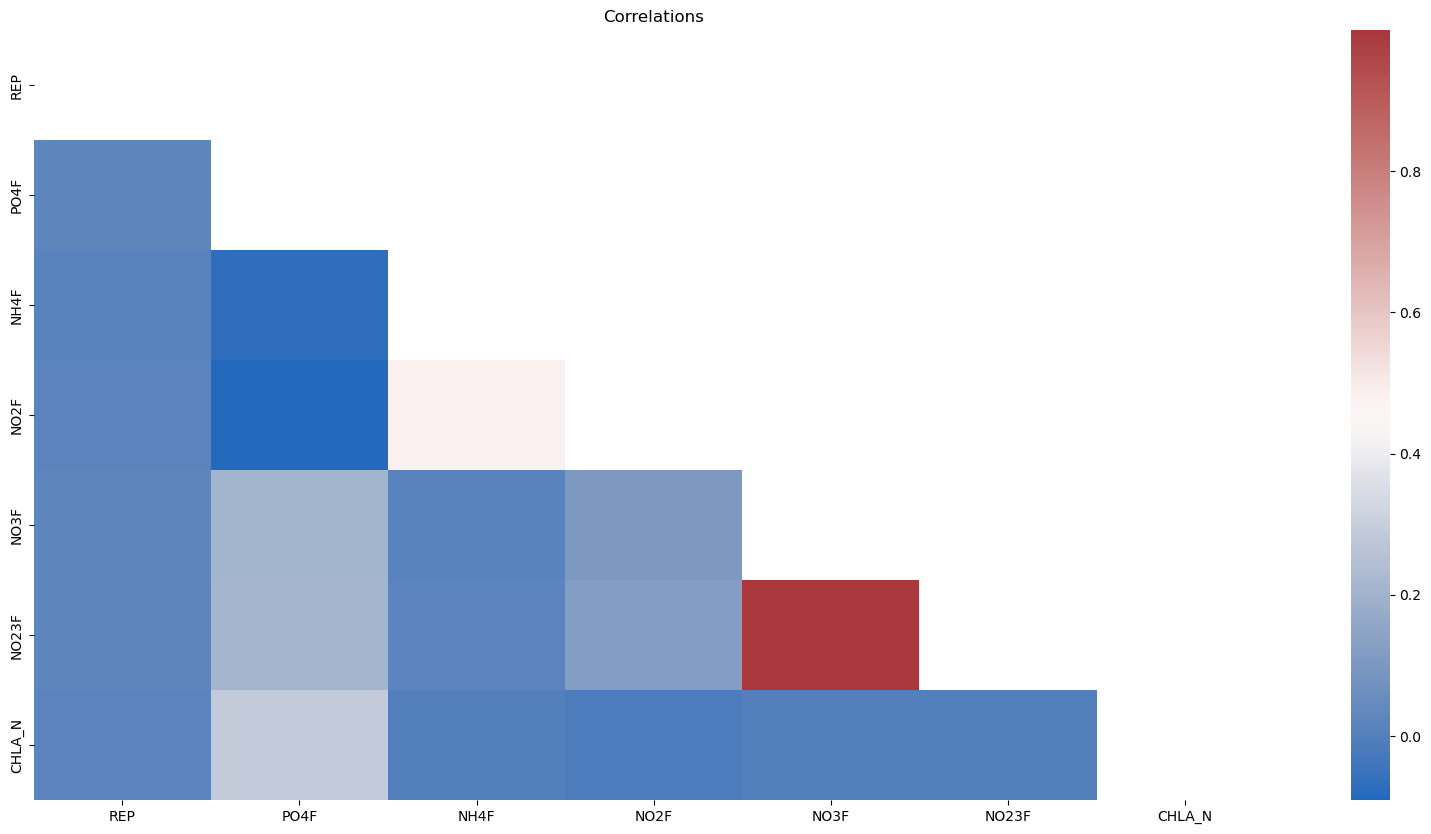

In [49]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(ipnut.corr(), annot = False, mask = np.triu(ipnut.corr()), cmap = 'vlag')
plt.show();

In [50]:
len(mbnut)

44

In [51]:
mbnut.isnull().sum()
mbnut.notnull().sum()
#See percentage of missing data
missing = mbnut.notnull().sum() / len(mbnut) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
CollMethd          100.000000
REP                100.000000
F_Record             0.000000
PO4F                86.363636
F_PO4F             100.000000
NH4F                36.363636
F_NH4F             100.000000
NO2F                52.272727
F_NO2F             100.000000
NO3F                50.000000
F_NO3F             100.000000
NO23F               86.363636
F_NO23F            100.000000
CHLA_N             100.000000
F_CHLA_N           100.000000
dtype: float64


In [52]:
mbnut = mbnut.dropna(axis='columns', thresh = 2)
mbnut = mbnut.drop(['ProvisionalPlus','Historical','CollMethd'],axis=1)

In [53]:
mbnut.isnull().sum()
mbnut.notnull().sum()
#See percentage of missing data
missing = mbnut.notnull().sum() / len(mbnut) * 100
print(missing)

StationCode      100.000000
isSWMP           100.000000
DateTimeStamp    100.000000
REP              100.000000
PO4F              86.363636
F_PO4F           100.000000
NH4F              36.363636
F_NH4F           100.000000
NO2F              52.272727
F_NO2F           100.000000
NO3F              50.000000
F_NO3F           100.000000
NO23F             86.363636
F_NO23F          100.000000
CHLA_N           100.000000
F_CHLA_N         100.000000
dtype: float64


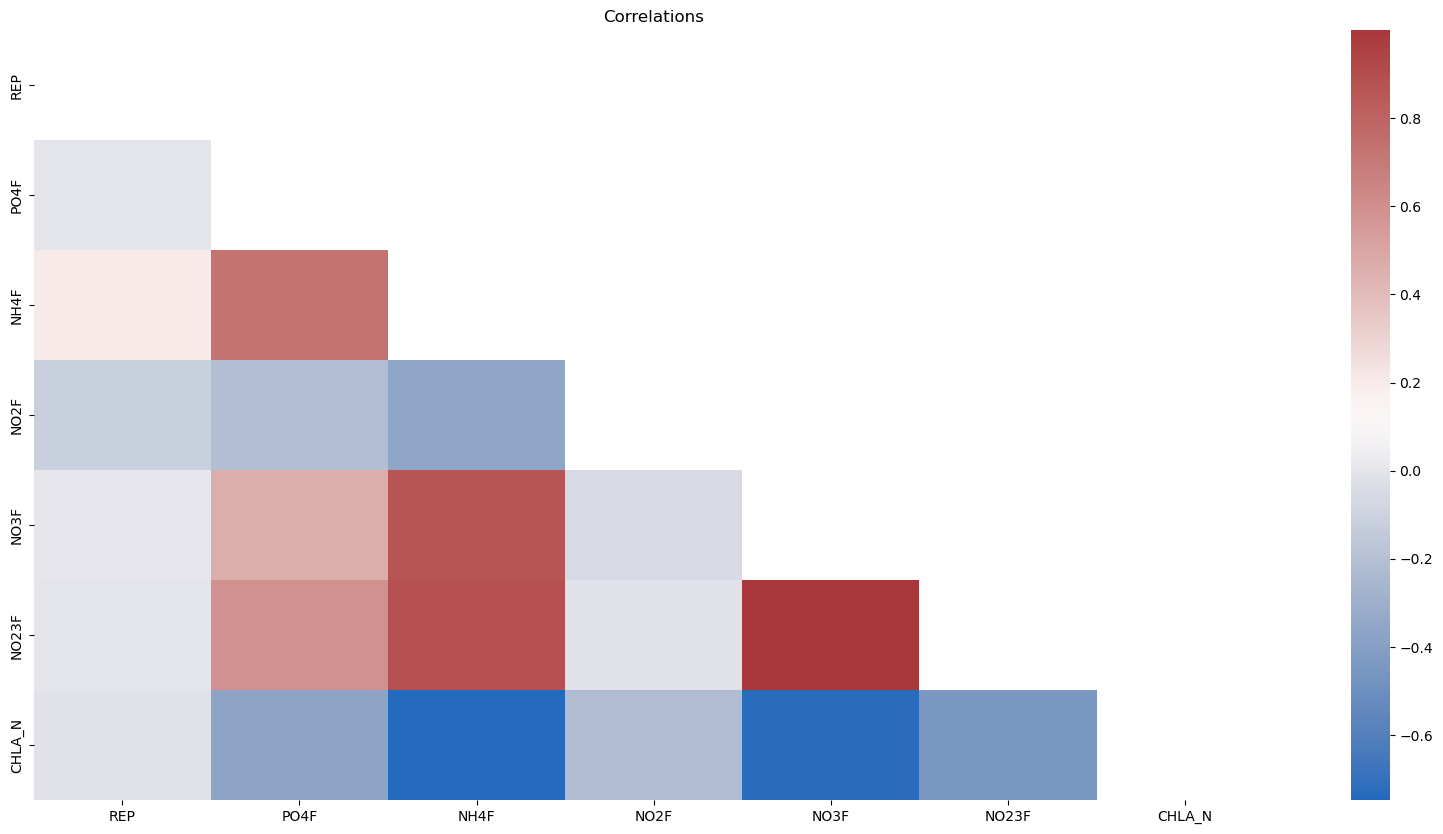

In [54]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(mbnut.corr(), annot = False, mask = np.triu(mbnut.corr()), cmap = 'vlag')
plt.show();

In [55]:
len(mcnut)

530

In [56]:
mcnut.isnull().sum()
mcnut.notnull().sum()
#See percentage of missing data
missing = mcnut.notnull().sum() / len(mcnut) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
CollMethd          100.000000
REP                100.000000
F_Record             3.207547
PO4F                99.245283
F_PO4F             100.000000
NH4F                96.981132
F_NH4F             100.000000
NO2F                90.377358
F_NO2F             100.000000
NO3F                88.679245
F_NO3F             100.000000
NO23F               97.924528
F_NO23F            100.000000
CHLA_N              96.037736
F_CHLA_N           100.000000
dtype: float64


In [57]:
mcnut = mcnut.dropna(axis='columns', thresh = 23)
mcnut = mcnut.drop(['ProvisionalPlus','Historical','CollMethd'],axis=1)

In [58]:
mcnut.isnull().sum()
mcnut.notnull().sum()
#See percentage of missing data
missing = mcnut.notnull().sum() / len(mcnut) * 100
print(missing)

StationCode      100.000000
isSWMP           100.000000
DateTimeStamp    100.000000
REP              100.000000
PO4F              99.245283
F_PO4F           100.000000
NH4F              96.981132
F_NH4F           100.000000
NO2F              90.377358
F_NO2F           100.000000
NO3F              88.679245
F_NO3F           100.000000
NO23F             97.924528
F_NO23F          100.000000
CHLA_N            96.037736
F_CHLA_N         100.000000
dtype: float64


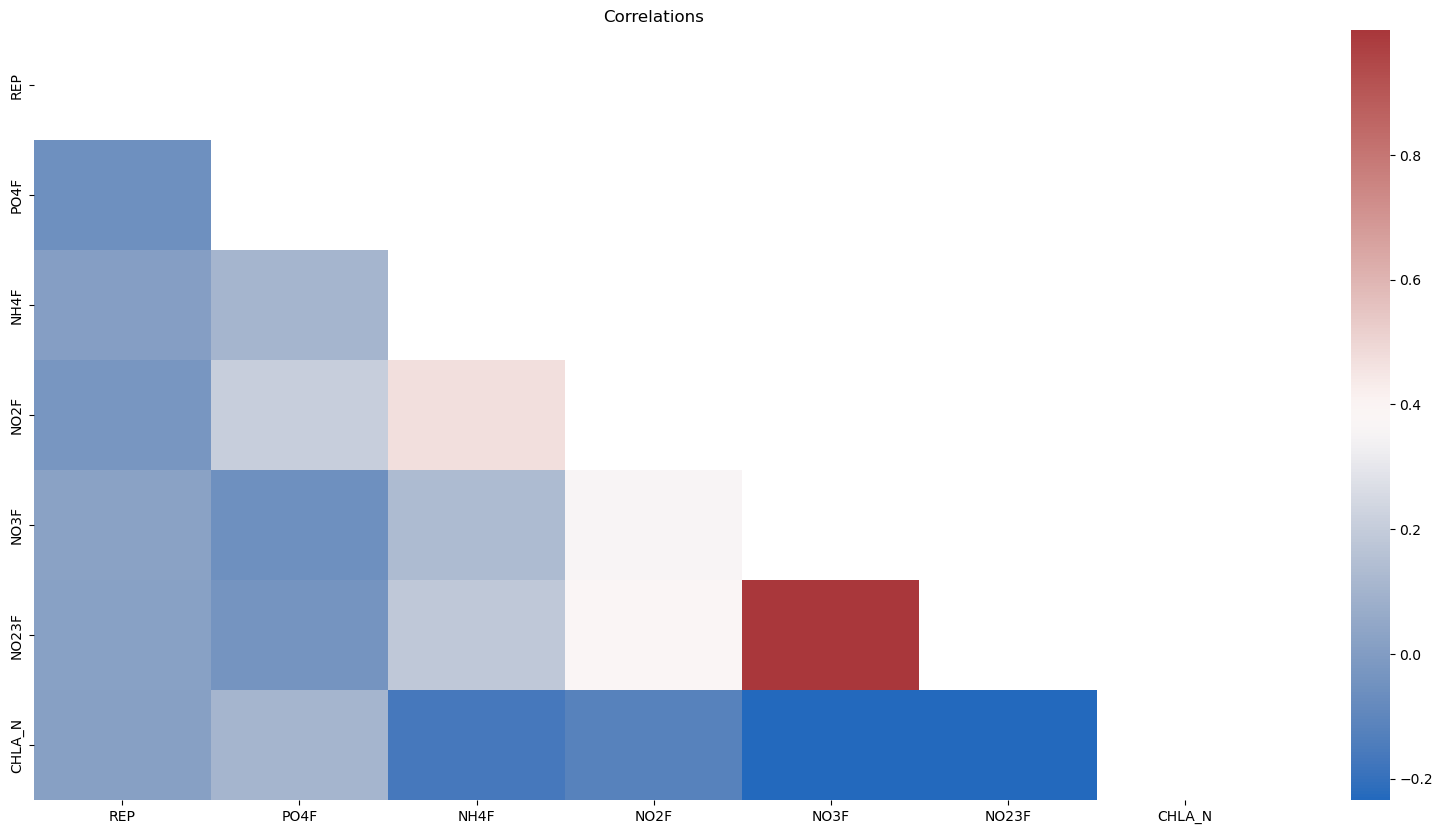

In [59]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(mcnut.corr(), annot = False, mask = np.triu(mcnut.corr()), cmap = 'vlag')
plt.show();

In [60]:
len(ocnut)

531

In [61]:
ocnut.isnull().sum()
ocnut.notnull().sum()
#See percentage of missing data
missing = ocnut.notnull().sum() / len(ocnut) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
CollMethd          100.000000
REP                100.000000
F_Record             0.753296
PO4F                91.902072
F_PO4F             100.000000
NH4F                99.058380
F_NH4F             100.000000
NO2F                94.350282
F_NO2F             100.000000
NO3F                92.655367
F_NO3F             100.000000
NO23F               98.870056
F_NO23F            100.000000
CHLA_N              97.175141
F_CHLA_N           100.000000
dtype: float64


In [62]:
ocnut = ocnut.dropna(axis='columns', thresh = 11)
ocnut = ocnut.drop(['ProvisionalPlus','Historical','CollMethd'],axis=1)

In [63]:
ocnut.isnull().sum()
ocnut.notnull().sum()
#See percentage of missing data
missing = ocnut.notnull().sum() / len(ocnut) * 100
print(missing)

StationCode      100.000000
isSWMP           100.000000
DateTimeStamp    100.000000
REP              100.000000
PO4F              91.902072
F_PO4F           100.000000
NH4F              99.058380
F_NH4F           100.000000
NO2F              94.350282
F_NO2F           100.000000
NO3F              92.655367
F_NO3F           100.000000
NO23F             98.870056
F_NO23F          100.000000
CHLA_N            97.175141
F_CHLA_N         100.000000
dtype: float64


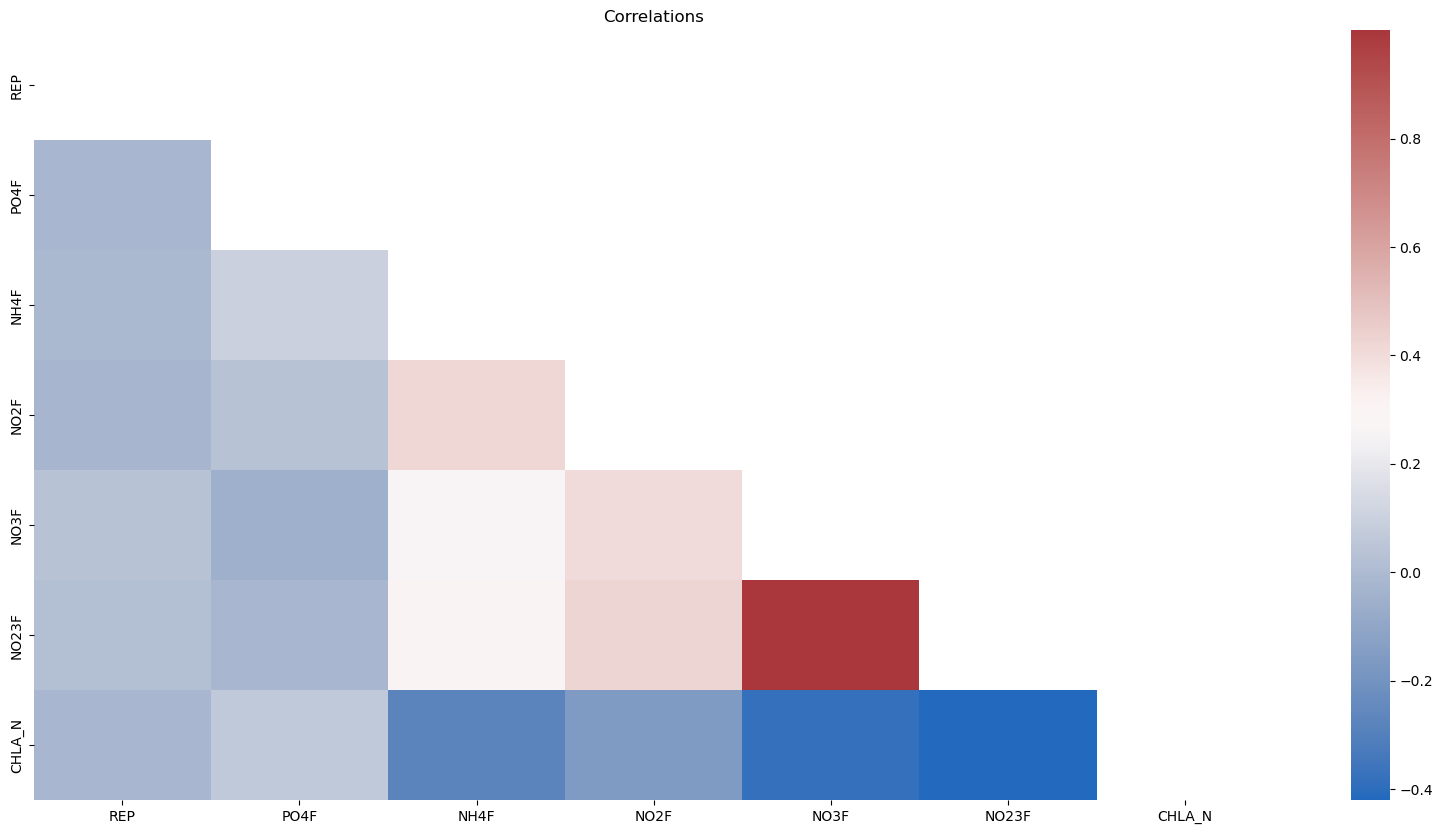

In [64]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(ocnut.corr(), annot = False, mask = np.triu(ocnut.corr()), cmap = 'vlag')
plt.show();

In [65]:
len(rrnut)

1102

In [66]:
rrnut.isnull().sum()
rrnut.notnull().sum()
#See percentage of missing data
missing = rrnut.notnull().sum() / len(rrnut) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
CollMethd          100.000000
REP                100.000000
F_Record             1.270417
PO4F                98.275862
F_PO4F             100.000000
NH4F                97.912886
F_NH4F             100.000000
NO2F                97.640653
F_NO2F             100.000000
NO3F                97.459165
F_NO3F             100.000000
NO23F               98.366606
F_NO23F            100.000000
CHLA_N              95.916515
F_CHLA_N           100.000000
dtype: float64


In [67]:
rrnut = rrnut.dropna(axis='columns', thresh = 34)
rrnut = rrnut.drop(['ProvisionalPlus','Historical','CollMethd'],axis=1)

In [68]:
rrnut.isnull().sum()
rrnut.notnull().sum()
#See percentage of missing data
missing = rrnut.notnull().sum() / len(rrnut) * 100
print(missing)

StationCode      100.000000
isSWMP           100.000000
DateTimeStamp    100.000000
REP              100.000000
PO4F              98.275862
F_PO4F           100.000000
NH4F              97.912886
F_NH4F           100.000000
NO2F              97.640653
F_NO2F           100.000000
NO3F              97.459165
F_NO3F           100.000000
NO23F             98.366606
F_NO23F          100.000000
CHLA_N            95.916515
F_CHLA_N         100.000000
dtype: float64


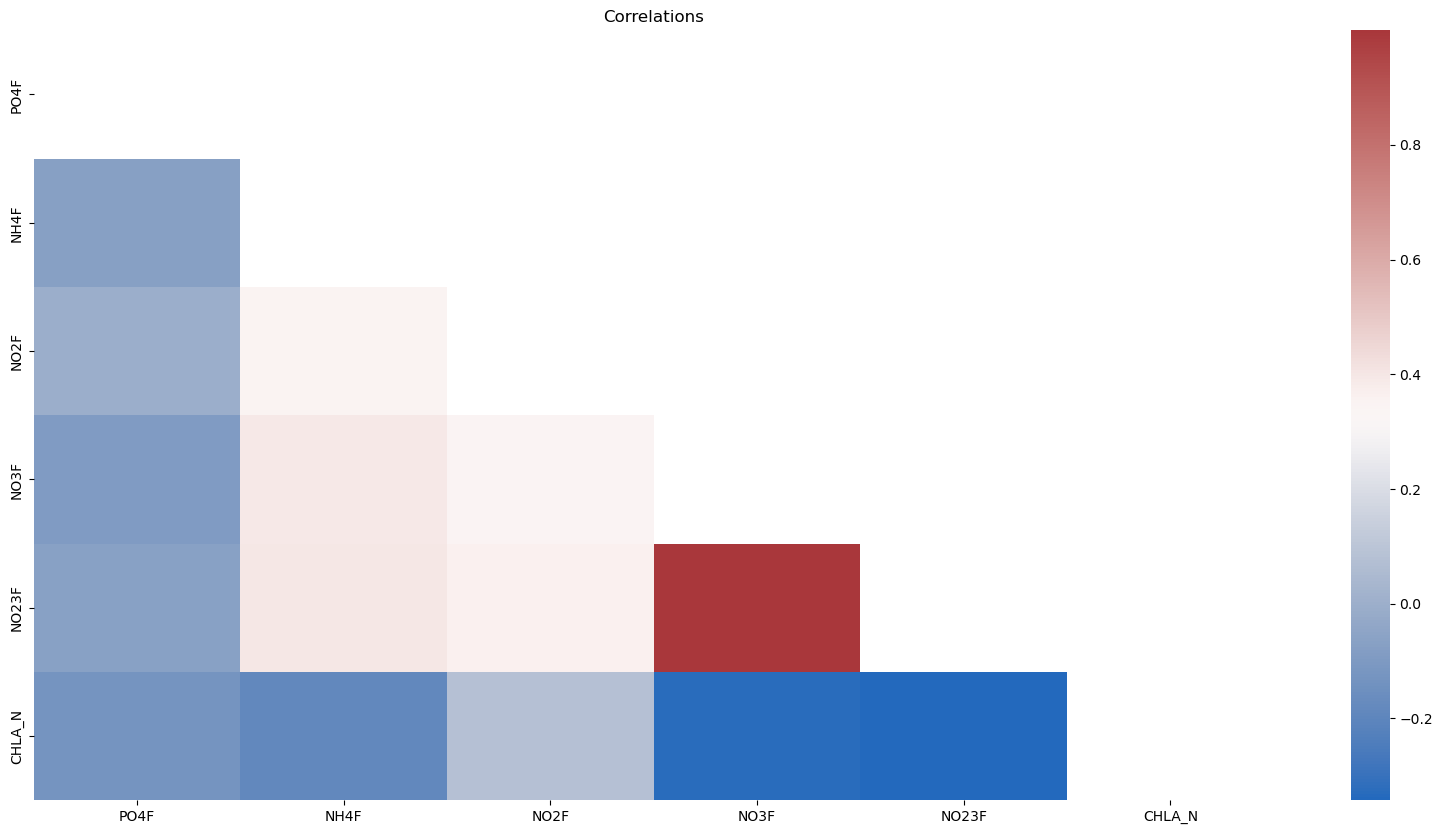

In [69]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(rrnut.corr(), annot = False, mask = np.triu(rrnut.corr()), cmap = 'vlag')
plt.show();

In [71]:
## Merge all dataframes
df1 = pd.merge(ipwq, jbwq, how='outer', on='DateTimeStamp', suffixes = ('_ip','_jbq'))
df2 = pd.merge(mbwq, mcwq, how='outer', on='DateTimeStamp', suffixes = ('_mb','_mc'))
df3 = pd.merge(ocwq, prwq, how='outer', on='DateTimeStamp', suffixes = ('_oc','_pr'))
df4 = pd.merge(rrwq, ipnut, how='outer', on='DateTimeStamp', suffixes = ('_rr','_ipn'))
df5 = pd.merge(mbnut, mcnut, how='outer', on='DateTimeStamp', suffixes = ('_mbn','_mcn'))
df6 = pd.merge(ocnut, rrnut, how='outer', on='DateTimeStamp', suffixes = ('_ocn','rrnut'))
jbmet[['StationCode','isSWMP','F_Record','ATemp','F_ATemp','RH','F_RH','BP','F_BP','WSpd','F_WSpd','MaxWSpd','F_MaxWSpd','MaxWSpdT','Wdir','F_Wdir','SDWDir','F_SDWDir','TotPAR','F_TotPAR','TotPrcp','F_TotPrcp','F_TotSoRad']].columns = jbmet[['StationCode','isSWMP','F_Record','ATemp','F_ATemp','RH','F_RH','BP','F_BP','WSpd','F_WSpd','MaxWSpd','F_MaxWSpd','MaxWSpdT','Wdir','F_Wdir','SDWDir','F_SDWDir','TotPAR','F_TotPAR','TotPrcp','F_TotPrcp','F_TotSoRad']].columns.map(lambda x: str(x) + '_jbm')


df7 = pd.merge(df1, df2, how='outer', on='DateTimeStamp')
df8 = pd.merge(df3, df4, how='outer', on='DateTimeStamp')
df9 = pd.merge(df5, df6, how='outer', on='DateTimeStamp')
df10 = pd.merge(df7, df8, how='outer', on='DateTimeStamp')
df11 = pd.merge(df9, df10, how='outer', on='DateTimeStamp')

df = pd.merge(df11, jbmet, how='outer', on='DateTimeStamp')


C:\Users\julie\AppData\Local\Temp\ipykernel_13012\2886906129.py:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'F_Record_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df11, jbmet, how='outer', on='DateTimeStamp')


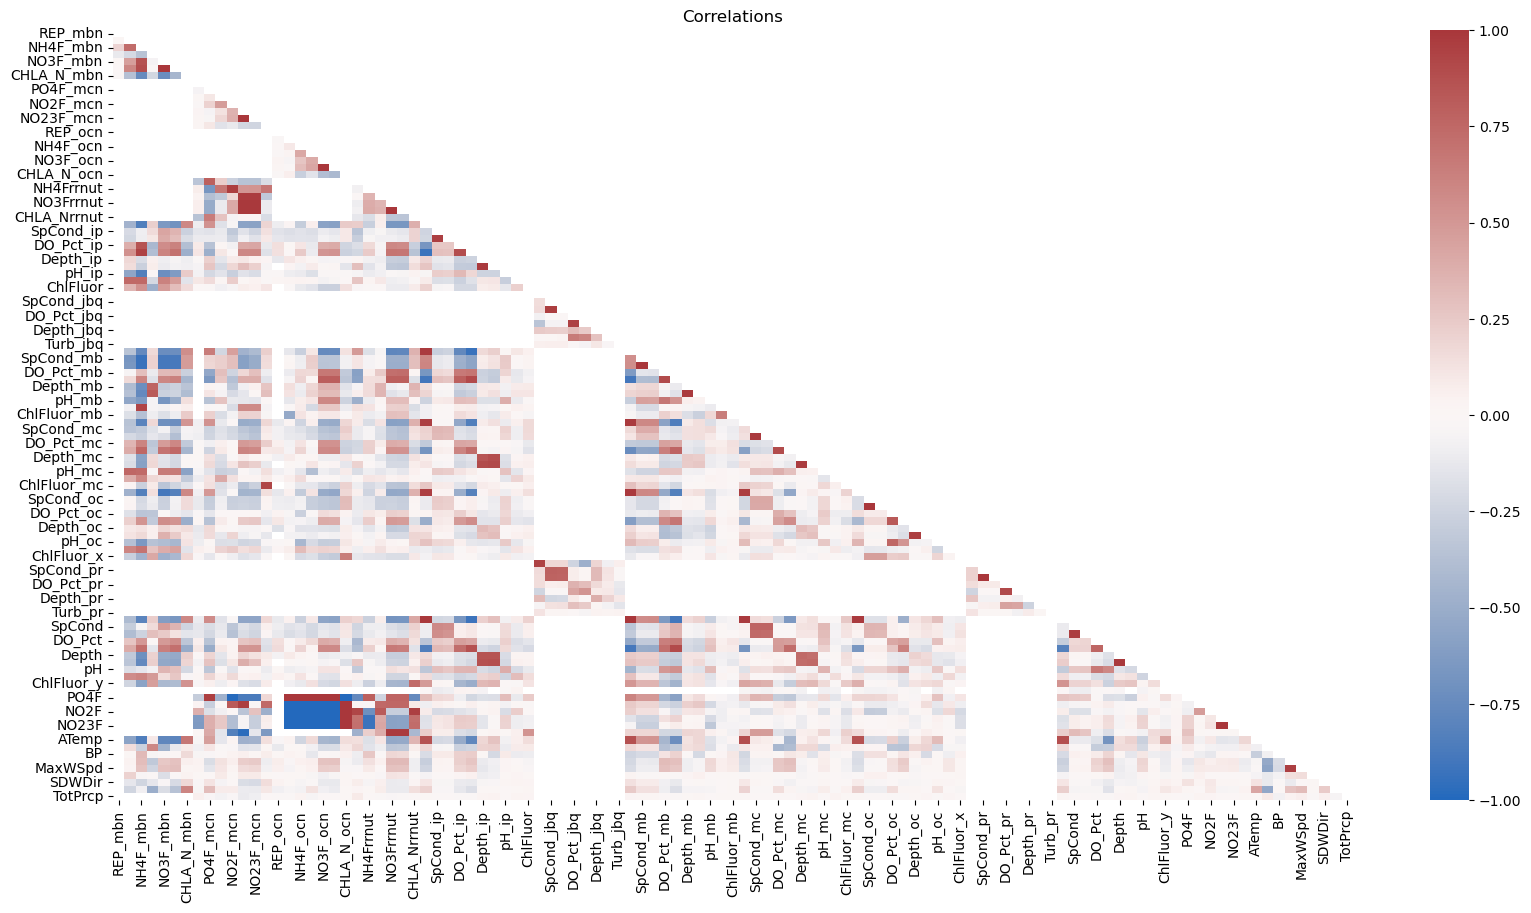

In [72]:
## Plot as a heatmap

plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(df.corr(), annot = False, mask = np.triu(df.corr()), cmap = 'vlag')
plt.show();

In [73]:
df.corr()

,REP_mbn,PO4F_mbn,NH4F_mbn,NO2F_mbn,NO3F_mbn,NO23F_mbn,CHLA_N_mbn,REP_mcn,PO4F_mcn,NH4F_mcn,...,CHLA_N,ATemp,RH,BP,WSpd,MaxWSpd,Wdir,SDWDir,TotPAR,TotPrcp
REP_mbn,1.000000,0.001221,0.202947,-0.119476,0.007120,-0.002565,-0.016277,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PO4F_mbn,0.001221,1.000000,0.727410,-0.211008,0.463361,0.590117,-0.367742,NaN,NaN,NaN,...,NaN,-0.576261,0.151258,0.015093,0.039556,0.025694,0.206061,-0.138486,-0.236072,NaN
NH4F_mbn,0.202947,0.727410,1.000000,-0.358618,0.865648,0.888810,-0.747766,NaN,NaN,NaN,...,NaN,-0.844616,-0.258268,0.320580,0.311220,0.281245,-0.035708,-0.235882,-0.078392,NaN
NO2F_mbn,-0.119476,-0.211008,-0.358618,1.000000,-0.056332,-0.016484,-0.227743,NaN,NaN,NaN,...,NaN,0.099939,0.579558,-0.040725,-0.315298,-0.249405,-0.008963,-0.136975,-0.496906,NaN
NO3F_mbn,0.007120,0.463361,0.865648,-0.056332,1.000000,0.999205,-0.730202,NaN,NaN,NaN,...,NaN,-0.780313,-0.458949,-0.013660,0.251257,0.281907,-0.183658,-0.033743,-0.188379,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MaxWSpd,NaN,0.025694,0.281245,-0.249405,0.281907,0.298429,0.021075,0.035884,-0.146384,0.112218,...,-0.089575,-0.024618,-0.565933,-0.210074,0.959063,1.000000,0.152276,-0.004328,0.314890,0.064726
Wdir,NaN,0.206061,-0.035708,-0.008963,-0.183658,-0.026853,0.045544,0.007525,-0.003974,0.089568,...,-0.001744,-0.060245,-0.122325,-0.068794,0.145381,0.152276,1.000000,0.005408,0.013808,-0.023121
SDWDir,NaN,-0.138486,-0.235882,-0.136975,-0.033743,-0.206018,0.178106,-0.036183,0.123335,-0.062046,...,0.003388,0.123122,-0.118908,-0.021544,-0.112127,-0.004328,0.005408,1.000000,0.235542,0.047701
TotPAR,NaN,-0.236072,-0.078392,-0.496906,-0.188379,-0.366136,0.597394,-0.045355,0.305715,0.079671,...,0.039697,0.423058,-0.540038,0.009244,0.275060,0.314890,0.013808,0.235542,1.000000,-0.050439


In [ ]:
df.describe(include=['number'])

In [ ]:
df.describe(exclude=['number'])

In [ ]:
df.head(20)

In [ ]:
#df1.to_csv('df1.csv')
#df2.to_csv('df2.csv')
#df3.to_csv('df3.csv')
#df4.to_csv('df4.csv')
#df5.to_csv('df5.csv')
#df6.to_csv('df6.csv')
df.to_csv('df.csv')